In [1]:
!git clone https://github.com/satyaNekkantiCompVison/pytorch_visionmodels.git

fatal: destination path 'pytorch_visionmodels' already exists and is not an empty directory.


In [2]:
!pip install --upgrade albumentations

# Change Directory to main repo

In [3]:
cd pytorch_visionmodels/

/content/pytorch_visionmodels


## Get Helper functions

In [4]:
from utils.helper import seed_everything, get_device, model_summary
seed_everything(42)
device = get_device()

CUDA Available: True


## Loading Train and Test loader

In [16]:
from utils.data_augmentations import get_train_loader, get_test_loader
train_loader = get_train_loader(BATCH_SIZE=128)
test_loader = get_test_loader(BATCH_SIZE=128)

Files already downloaded and verified
Files already downloaded and verified


## Resnet 18 Model summary with LN

In [14]:
from models.resnet import resnet18
from utils.helper import model_summary

model = resnet18("LN").to(device)

model_summary(model, (3, 32, 32))

----------------------------------------------------------------
        Layer (type)               Output Shape         Param #
            Conv2d-1           [-1, 64, 32, 32]           1,728
         GroupNorm-2           [-1, 64, 32, 32]             128
            Conv2d-3           [-1, 64, 32, 32]          36,864
         GroupNorm-4           [-1, 64, 32, 32]             128
            Conv2d-5           [-1, 64, 32, 32]          36,864
         GroupNorm-6           [-1, 64, 32, 32]             128
        BasicBlock-7           [-1, 64, 32, 32]               0
            Conv2d-8           [-1, 64, 32, 32]          36,864
         GroupNorm-9           [-1, 64, 32, 32]             128
           Conv2d-10           [-1, 64, 32, 32]          36,864
        GroupNorm-11           [-1, 64, 32, 32]             128
       BasicBlock-12           [-1, 64, 32, 32]               0
           Conv2d-13          [-1, 128, 16, 16]          73,728
        GroupNorm-14          [-1, 128,

## Training and Testing model


In [17]:
import torch.nn.functional as F
import torch.nn as nn
import torch.optim as optim

from main import fit_model
epochs = 40
lr = 0.001

optimizer = optim.Adam(model.parameters(), lr)
scheduler = optim.lr_scheduler.ReduceLROnPlateau(optimizer,mode='min', patience=8, verbose=True)
criterion = nn.CrossEntropyLoss()

experiment_parameters = fit_model(model, device, epochs, optimizer,criterion, train_loader,test_loader,scheduler)

EPOCH: 1 (LR: 0.001)


Batch_id=390 Loss=15.17206 Accuracy=21.03%: 100%|██████████| 391/391 [04:38<00:00,  1.40it/s]



Test set: Average loss: 1.9889, Accuracy: 2184/10000 (21.84%)
EPOCH: 2 (LR: 0.001)


Batch_id=390 Loss=14.02129 Accuracy=22.06%: 100%|██████████| 391/391 [04:38<00:00,  1.40it/s]



Test set: Average loss: 1.9395, Accuracy: 2444/10000 (24.44%)
EPOCH: 3 (LR: 0.001)


Batch_id=390 Loss=13.97876 Accuracy=22.65%: 100%|██████████| 391/391 [04:37<00:00,  1.41it/s]



Test set: Average loss: 1.9268, Accuracy: 2504/10000 (25.04%)
EPOCH: 4 (LR: 0.001)


Batch_id=390 Loss=13.94990 Accuracy=22.97%: 100%|██████████| 391/391 [04:37<00:00,  1.41it/s]



Test set: Average loss: 1.9339, Accuracy: 2444/10000 (24.44%)
EPOCH: 5 (LR: 0.001)


Batch_id=390 Loss=13.95834 Accuracy=23.19%: 100%|██████████| 391/391 [04:38<00:00,  1.40it/s]



Test set: Average loss: 1.9096, Accuracy: 2542/10000 (25.42%)
EPOCH: 6 (LR: 0.001)


Batch_id=390 Loss=13.97309 Accuracy=23.81%: 100%|██████████| 391/391 [04:38<00:00,  1.40it/s]



Test set: Average loss: 1.8852, Accuracy: 2666/10000 (26.66%)
EPOCH: 7 (LR: 0.001)


Batch_id=390 Loss=13.92728 Accuracy=24.14%: 100%|██████████| 391/391 [04:37<00:00,  1.41it/s]



Test set: Average loss: 1.8720, Accuracy: 2568/10000 (25.68%)
EPOCH: 8 (LR: 0.001)


Batch_id=390 Loss=13.93769 Accuracy=24.98%: 100%|██████████| 391/391 [04:37<00:00,  1.41it/s]



Test set: Average loss: 1.8709, Accuracy: 2621/10000 (26.21%)
EPOCH: 9 (LR: 0.001)


Batch_id=390 Loss=13.94846 Accuracy=25.62%: 100%|██████████| 391/391 [04:38<00:00,  1.40it/s]



Test set: Average loss: 1.8400, Accuracy: 2712/10000 (27.12%)
EPOCH: 10 (LR: 0.001)


Batch_id=390 Loss=13.93786 Accuracy=26.14%: 100%|██████████| 391/391 [04:38<00:00,  1.41it/s]



Test set: Average loss: 1.8635, Accuracy: 2702/10000 (27.02%)
EPOCH: 11 (LR: 0.001)


Batch_id=390 Loss=13.90531 Accuracy=26.37%: 100%|██████████| 391/391 [04:37<00:00,  1.41it/s]



Test set: Average loss: 1.8362, Accuracy: 2718/10000 (27.18%)
EPOCH: 12 (LR: 0.001)


Batch_id=390 Loss=13.92408 Accuracy=26.42%: 100%|██████████| 391/391 [04:37<00:00,  1.41it/s]



Test set: Average loss: 1.7916, Accuracy: 2890/10000 (28.90%)
EPOCH: 13 (LR: 0.001)


Batch_id=390 Loss=13.93242 Accuracy=26.68%: 100%|██████████| 391/391 [04:38<00:00,  1.41it/s]



Test set: Average loss: 1.8082, Accuracy: 2854/10000 (28.54%)
EPOCH: 14 (LR: 0.001)


Batch_id=390 Loss=13.90472 Accuracy=27.00%: 100%|██████████| 391/391 [04:38<00:00,  1.41it/s]



Test set: Average loss: 1.7973, Accuracy: 2969/10000 (29.69%)
EPOCH: 15 (LR: 0.001)


Batch_id=390 Loss=13.91411 Accuracy=26.76%: 100%|██████████| 391/391 [04:37<00:00,  1.41it/s]



Test set: Average loss: 1.8680, Accuracy: 2692/10000 (26.92%)
EPOCH: 16 (LR: 0.001)


Batch_id=390 Loss=13.93283 Accuracy=27.04%: 100%|██████████| 391/391 [04:37<00:00,  1.41it/s]



Test set: Average loss: 1.7930, Accuracy: 2870/10000 (28.70%)
EPOCH: 17 (LR: 0.001)


Batch_id=390 Loss=13.93471 Accuracy=27.38%: 100%|██████████| 391/391 [04:38<00:00,  1.41it/s]



Test set: Average loss: 1.7966, Accuracy: 2924/10000 (29.24%)
EPOCH: 18 (LR: 0.001)


Batch_id=390 Loss=13.90856 Accuracy=27.20%: 100%|██████████| 391/391 [04:38<00:00,  1.41it/s]



Test set: Average loss: 1.7933, Accuracy: 2897/10000 (28.97%)
EPOCH: 19 (LR: 0.001)


Batch_id=390 Loss=13.91830 Accuracy=27.22%: 100%|██████████| 391/391 [04:37<00:00,  1.41it/s]



Test set: Average loss: 1.8068, Accuracy: 2891/10000 (28.91%)
EPOCH: 20 (LR: 0.001)


Batch_id=390 Loss=13.94282 Accuracy=27.43%: 100%|██████████| 391/391 [04:37<00:00,  1.41it/s]



Test set: Average loss: 1.7953, Accuracy: 2867/10000 (28.67%)
EPOCH: 21 (LR: 0.001)


Batch_id=390 Loss=13.92923 Accuracy=27.60%: 100%|██████████| 391/391 [04:38<00:00,  1.41it/s]



Test set: Average loss: 1.7833, Accuracy: 2951/10000 (29.51%)
EPOCH: 22 (LR: 0.001)


Batch_id=390 Loss=13.91059 Accuracy=27.58%: 100%|██████████| 391/391 [04:37<00:00,  1.41it/s]



Test set: Average loss: 1.7682, Accuracy: 3013/10000 (30.13%)
EPOCH: 23 (LR: 0.001)


Batch_id=390 Loss=13.92411 Accuracy=27.83%: 100%|██████████| 391/391 [04:37<00:00,  1.41it/s]



Test set: Average loss: 1.7775, Accuracy: 2978/10000 (29.78%)
EPOCH: 24 (LR: 0.001)


Batch_id=390 Loss=13.95131 Accuracy=27.39%: 100%|██████████| 391/391 [04:37<00:00,  1.41it/s]



Test set: Average loss: 1.7671, Accuracy: 3052/10000 (30.52%)
EPOCH: 25 (LR: 0.001)


Batch_id=390 Loss=13.91995 Accuracy=27.59%: 100%|██████████| 391/391 [04:38<00:00,  1.41it/s]



Test set: Average loss: 1.7698, Accuracy: 2976/10000 (29.76%)
EPOCH: 26 (LR: 0.001)


Batch_id=390 Loss=13.92556 Accuracy=27.44%: 100%|██████████| 391/391 [04:38<00:00,  1.41it/s]



Test set: Average loss: 1.7925, Accuracy: 2958/10000 (29.58%)
EPOCH: 27 (LR: 0.001)


Batch_id=390 Loss=13.94669 Accuracy=27.69%: 100%|██████████| 391/391 [04:37<00:00,  1.41it/s]



Test set: Average loss: 1.7686, Accuracy: 3042/10000 (30.42%)
EPOCH: 28 (LR: 0.001)


Batch_id=390 Loss=13.94817 Accuracy=27.85%: 100%|██████████| 391/391 [04:36<00:00,  1.41it/s]



Test set: Average loss: 1.7723, Accuracy: 2942/10000 (29.42%)
EPOCH: 29 (LR: 0.001)


Batch_id=390 Loss=13.91974 Accuracy=27.70%: 100%|██████████| 391/391 [04:38<00:00,  1.40it/s]



Test set: Average loss: 1.7606, Accuracy: 2916/10000 (29.16%)
EPOCH: 30 (LR: 0.001)


Batch_id=390 Loss=13.94285 Accuracy=27.68%: 100%|██████████| 391/391 [04:38<00:00,  1.40it/s]



Test set: Average loss: 1.7519, Accuracy: 3043/10000 (30.43%)
EPOCH: 31 (LR: 0.001)


Batch_id=390 Loss=13.95359 Accuracy=28.03%: 100%|██████████| 391/391 [04:39<00:00,  1.40it/s]



Test set: Average loss: 1.7629, Accuracy: 3080/10000 (30.80%)
EPOCH: 32 (LR: 0.001)


Batch_id=390 Loss=13.93298 Accuracy=27.80%: 100%|██████████| 391/391 [04:38<00:00,  1.40it/s]



Test set: Average loss: 1.7538, Accuracy: 3064/10000 (30.64%)
EPOCH: 33 (LR: 0.001)


Batch_id=390 Loss=13.93510 Accuracy=27.96%: 100%|██████████| 391/391 [04:39<00:00,  1.40it/s]



Test set: Average loss: 1.7478, Accuracy: 3099/10000 (30.99%)
EPOCH: 34 (LR: 0.001)


Batch_id=390 Loss=13.95652 Accuracy=27.87%: 100%|██████████| 391/391 [04:38<00:00,  1.40it/s]



Test set: Average loss: 1.7992, Accuracy: 2946/10000 (29.46%)
EPOCH: 35 (LR: 0.001)


Batch_id=390 Loss=13.95140 Accuracy=28.06%: 100%|██████████| 391/391 [04:38<00:00,  1.40it/s]



Test set: Average loss: 1.7527, Accuracy: 2949/10000 (29.49%)
EPOCH: 36 (LR: 0.001)


Batch_id=390 Loss=13.93441 Accuracy=27.88%: 100%|██████████| 391/391 [04:38<00:00,  1.41it/s]



Test set: Average loss: 1.7670, Accuracy: 2951/10000 (29.51%)
EPOCH: 37 (LR: 0.001)


Batch_id=390 Loss=13.94731 Accuracy=27.67%: 100%|██████████| 391/391 [04:38<00:00,  1.41it/s]



Test set: Average loss: 1.7527, Accuracy: 2948/10000 (29.48%)
EPOCH: 38 (LR: 0.001)


Batch_id=390 Loss=13.96255 Accuracy=27.70%: 100%|██████████| 391/391 [04:37<00:00,  1.41it/s]



Test set: Average loss: 1.7632, Accuracy: 3028/10000 (30.28%)
EPOCH: 39 (LR: 0.001)


Batch_id=390 Loss=13.95400 Accuracy=27.96%: 100%|██████████| 391/391 [04:35<00:00,  1.42it/s]



Test set: Average loss: 1.8188, Accuracy: 2915/10000 (29.15%)
EPOCH: 40 (LR: 0.001)


Batch_id=390 Loss=13.94006 Accuracy=27.92%: 100%|██████████| 391/391 [04:35<00:00,  1.42it/s]



Test set: Average loss: 1.7508, Accuracy: 3022/10000 (30.22%)


## Plotting graphs



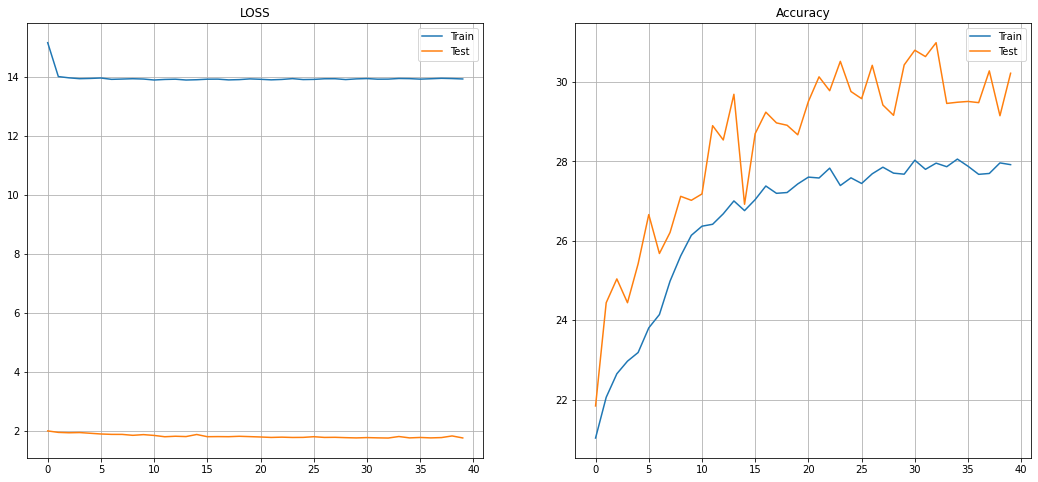

In [18]:
from utils.plot_images import plot_axis
train_Acc,train_Loss, test_Acc, test_Loss = experiment_parameters

plot_axis(train_Loss, test_Loss, train_Acc,test_Acc)

## Plotting misclassified images

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


Total wrong predictions are 6978


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


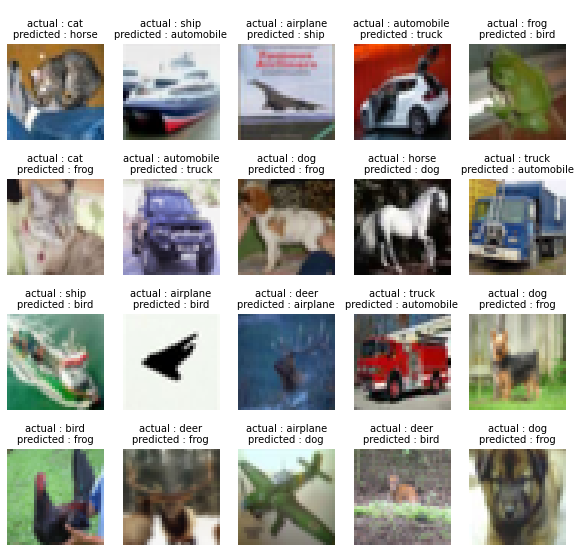

In [19]:
from utils.plot_images import misclassified_images
import torch
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

images_misclassified = misclassified_images(model, test_loader, device)

## GradCAM output for misclassified images

/usr/local/lib/python3.7/dist-packages/torch/nn/modules/module.py:1025: UserWarning: Using a non-full backward hook when the forward contains multiple autograd Nodes is deprecated and will be removed in future versions. This hook will be missing some grad_input. Please use register_full_backward_hook to get the documented behavior.
  warnings.warn("Using a non-full backward hook when the forward contains multiple autograd Nodes "


Generating Grad-CAM for layer1
Generating Grad-CAM for layer2
Generating Grad-CAM for layer3
Generating Grad-CAM for layer4


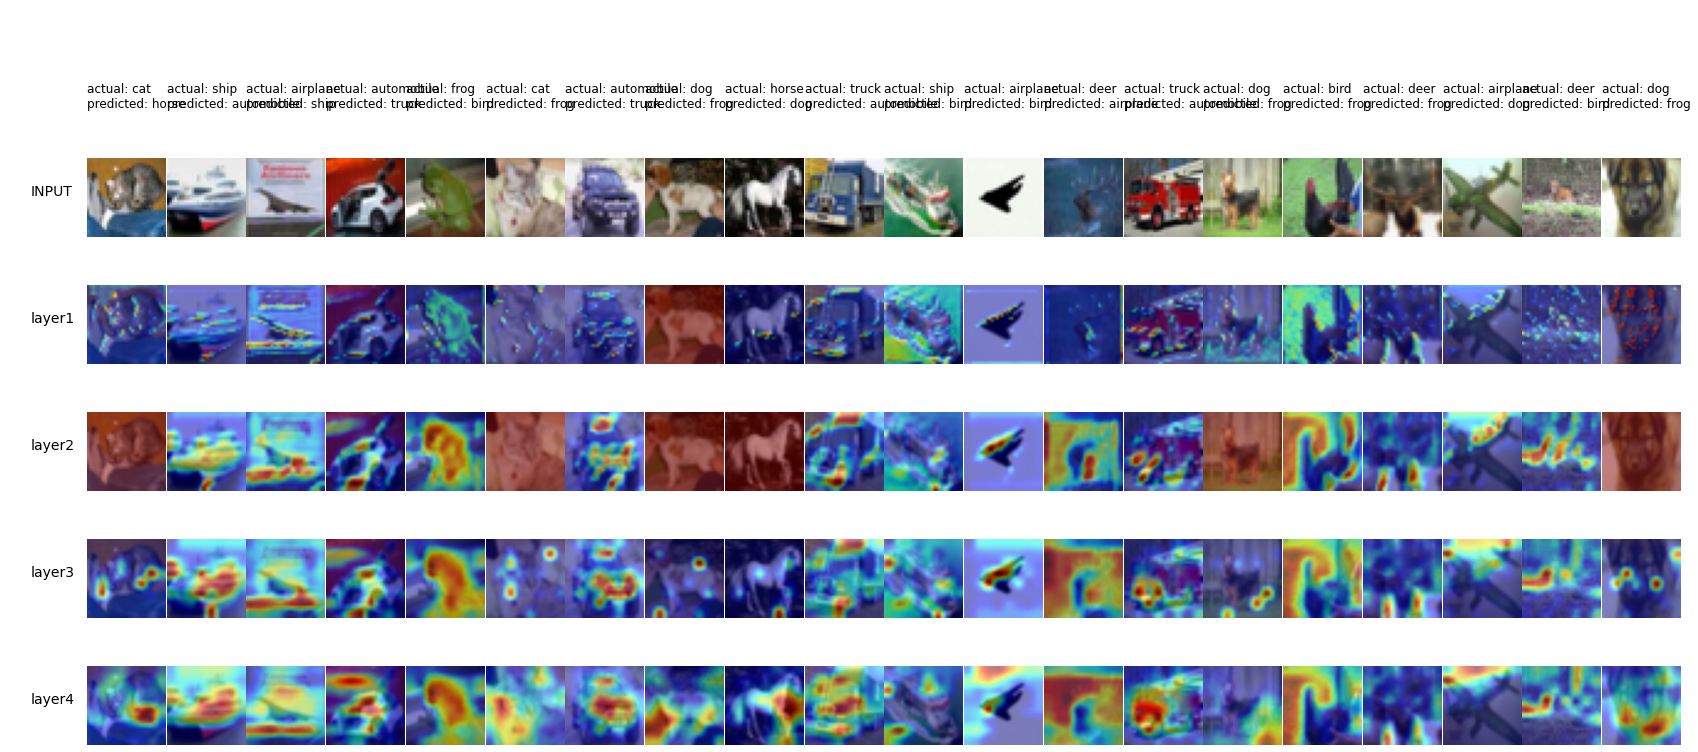

In [20]:
from utils.gradcam import generate_gradcam, plot_gradcam
target_layers = ["layer1", "layer2", "layer3", "layer4"]
labels = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
gradcam_output, probs, predicted_classes = generate_gradcam(images_misclassified[:20], model, target_layers, device)
plot_gradcam(gradcam_output, target_layers, labels, (3, 32, 32), predicted_classes, images_misclassified[:20])